# 1. Setup and Data Loading

In [1]:
!pip install billboard.py

In [8]:
import billboard as b
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from datetime import datetime
from collections import Counter
import re
import seaborn as sns
from sklearn.model_selection import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import *
from sklearn.pipeline import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.svm import *
import kagglehub

In [9]:
file_config = {
    "billboard": "monthly_song_2000~2023.csv",
    "kaggle": "billboard_24years_lyrics_spotify.csv"
}

In [11]:
def setup_file_paths(files):
    if os.path.exists(files["billboard"]) and os.path.exists(files["kaggle"]):
        print("file exists")
        global billboard_path, kaggle_path, csv_file_path
        billboard_path = files["billboard"]
        kaggle_path = files["kaggle"]
        csv_file_path = files["kaggle"]

    else:
        print("no file found")

setup_file_paths(file_config)

file exists


## Using **billboard** library

In [12]:
# chart = b.ChartData('hot-100')
chart = b.ChartData('pop-songs', date='2000-01-01')
chart.title

'Pop Airplay'

In [13]:
song_lib = []

for song in chart:
    song_lib.append({
        'rank': song.rank,
        'title': song.title,
        'artist': song.artist
    })
# song_lib

In [15]:
# Download latest version
path = kagglehub.dataset_download("suparnabiswas/billboard-hot-1002000-2023-data-with-features")

print("Path to dataset files:", path)

100%|██████████| 1.93M/1.93M [00:00<00:00, 147MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/suparnabiswas/billboard-hot-1002000-2023-data-with-features/versions/1


In [17]:
df = pd.read_csv('billboard_24years_lyrics_spotify.csv')
df.head(3)

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,1,Breathe,Faith Hill,/wiki/Breathe_(Faith_Hill_song),Breathe,/wiki/Faith_Hill,2000,I can feel the magic floating in the air\nBein...,spotify:track:3y4LxiYMgDl4RethdzpmNe,0.529,...,0.000000,0.251,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547.0,4.0
1,2,Smooth,Santana,/wiki/Smooth_(Santana_song),Smooth,/wiki/Santana_(band),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:0n2SEXB2qoRQg171q7XqeW,0.609,...,0.000005,0.295,0.961,115.996,audio_features,0n2SEXB2qoRQg171q7XqeW,https://api.spotify.com/v1/tracks/0n2SEXB2qoRQ...,https://api.spotify.com/v1/audio-analysis/0n2S...,294987.0,4.0
2,2,Smooth,Rob Thomas,/wiki/Smooth_(Santana_song),Smooth,/wiki/Rob_Thomas_(musician),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:5IALWUYK0zDSEmZgb4ICvc,0.590,...,0.807000,0.299,0.724,115.983,audio_features,5IALWUYK0zDSEmZgb4ICvc,https://api.spotify.com/v1/tracks/5IALWUYK0zDS...,https://api.spotify.com/v1/audio-analysis/5IAL...,244924.0,4.0


In [18]:
# df['year'].nunique()
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ranking           3397 non-null   int64  
 1   song              3397 non-null   object 
 2   band_singer       3397 non-null   object 
 3   songurl           3397 non-null   object 
 4   titletext         3397 non-null   object 
 5   url               3397 non-null   object 
 6   year              3397 non-null   int64  
 7   lyrics            3397 non-null   object 
 8   uri               3397 non-null   object 
 9   danceability      486 non-null    float64
 10  energy            486 non-null    float64
 11  key               486 non-null    float64
 12  loudness          486 non-null    float64
 13  mode              486 non-null    float64
 14  speechiness       486 non-null    float64
 15  acousticness      486 non-null    float64
 16  instrumentalness  486 non-null    float64


using billboard lib, download hot-100 songs from 2000 ~ 2023

In [20]:
def get_monthly_billboard_charts(start_year, end_year, chart_name = 'hot-100'):
    billboard_data = []

    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            date_str = f'{year}-{month:02d}-01'

            chart = b.ChartData(chart_name, date = date_str)

            for song in chart:
                billboard_data.append({
                    'date': date_str,
                    'year': year,
                    'month': month,
                    'rank': song.rank,
                    'title': song.title,
                    'artist': song.artist,
                    'weeks': song.weeks
                })

            print(f'{date_str} collecting')

    df_billboard = pd.DataFrame(billboard_data)
    return df_billboard

# 2. Data Preprocessing & Merging

In [21]:
def match_billboard_with_csv(billboard_df, csv_path, csv_title_colum = 'titletext'):
    df_csv = pd.read_csv(csv_path)

    billboard_df['title_normalized'] = billboard_df['title'].str.lower().str.strip()
    df_csv['title_normalized'] = df_csv[csv_title_column].str.lower().str.strip()

    csv_titles = set(df_csv['title_normalized'].unique())

    billboard_df['matched'] = billboard_df['title_normalized'].isin(csv_titles)

    matched_df = billboard_df[billboard_df['matched'] == True].copy()

    result_df = matched_df.merge(
        df_csv[['title_normalized', 'lyrics', 'url']],
        on='title_normalized',
        how='left'
    )

    print(f'\ntotal song: {len(billboard_df)}')
    print(f'match with csv file: {len(matched_df)}')
    print(f'match rate: {len(matched_df)/len(billboard_df)*100:.2f}%')

    return result_df

it took 1 hr and 40 minute run only one time to save songs below

In [22]:
# if __name__ == "__main__":
#     df_billboard = get_monthly_billboard_charts(2000, 2023, chart_name = 'hot-100')

#     csv_file_path = 'billboard_24years_lyrics_spotify.csv'
#     df_matched = match_billboard_with_csv(df_billboard, csv_file_path, csv_title_column = 'titletext')

#     df_billboard.to_csv('billboard_2000_2023_monthly.csv', index = False, encoding = 'utf-8')
#     df_matched.to_csv('billboard_matched_with_csv.csv', index = False, encoding = 'utf-8')

#     print("\nmatched data")
#     print(df_matched.head(10))

#     print("\nmatch data by year")
#     yearly_stats = df_matched.groupby('year').agg({
#         'title': 'count',
#         'rank': 'mean'
#     }).rename(columns={'title': 'matched songs', 'rank': 'rank'})
#     print(yearly_stats)

In [23]:
# billboard

In [25]:
# df_billboard.to_csv('monthly_song_2000~2023.csv', index=False, encoding='utf-8')

This code above is making monthly top 100 songs from 2000 ~ 2023<br>
csv will be saved as billboard_2000_2023_monthly.csv

In [26]:
def match_billboard_titles(billboard_csv, kaggle_csv, billboard_title_col = 'title', kaggle_title_col = 'titletext'):
    df_billboard = pd.read_csv(billboard_csv)
    df_kaggle = pd.read_csv(kaggle_csv)

    df_billboard['title_norm'] = df_billboard[billboard_title_col].str.lower().str.strip()
    df_kaggle['titletext_norm'] = df_kaggle[kaggle_title_col].str.lower().str.strip()

    kaggle_titles_set = set(df_kaggle['titletext_norm'].unique())
    df_billboard['matched'] = df_billboard['title_norm'].isin(kaggle_titles_set)

    matched_df = df_billboard[df_billboard['matched'] == True].copy()

    print('total songs: ', len(df_billboard))
    print('matched songs: ', len(matched_df))
    print('matching rate: ', len(matched_df)/len(df_billboard)*100)

    return df_billboard, matched_df

In [27]:
billboard_path = 'monthly_song_2000~2023.csv'
kaggle_path = 'billboard_24years_lyrics_spotify.csv'
df_all, df_matched = match_billboard_titles(billboard_path, kaggle_path)

total songs:  28800
matched songs:  14207
matching rate:  49.329861111111114


In [28]:
df_all.to_csv('billboard_with_matched.csv', index = False)

In [29]:
df_matched.to_csv('billboard_matched_only.csv', index = False)

In [30]:
billboard_path = 'monthly_song_2000~2023.csv'
kaggle_path = 'billboard_24years_lyrics_spotify.csv'

In [31]:
billboard = pd.read_csv(billboard_path)
kaggle = pd.read_csv(kaggle_path)
billboard
# kaggle

,date,year,month,rank,title,artist,weeks
0,2000-01-01,2000,1,1,Smooth,Santana Featuring Rob Thomas,23
1,2000-01-01,2000,1,2,Back At One,Brian McKnight,19
2,2000-01-01,2000,1,3,I Wanna Love You Forever,Jessica Simpson,12
3,2000-01-01,2000,1,4,My Love Is Your Love,Whitney Houston,18
4,2000-01-01,2000,1,5,I Knew I Loved You,Savage Garden,11
...,...,...,...,...,...,...,...
28795,2023-12-01,2023,12,96,Different 'Round Here,Riley Green Featuring Luke Combs,2
28796,2023-12-01,2023,12,97,Bongos,Cardi B & Megan Thee Stallion,11
28797,2023-12-01,2023,12,98,But I Got A Beer In My Hand,Luke Bryan,6
28798,2023-12-01,2023,12,99,Calling For You,Drake Featuring 21 Savage,4


In [32]:
billboard['title_norm'] = billboard['title'].str.lower().str.strip()
kaggle['title_norm'] = kaggle['titletext'].str.lower().str.strip()
# kaggle

In [33]:
billboard['matched'] = billboard['title_norm'].isin(set(kaggle['title_norm']))
matched = billboard[billboard['matched']]
unique_bb = billboard['title_norm'].nunique()
unique_mt = matched['title_norm'].nunique()
total = len(billboard)
matched_total = len(matched)
rate = matched_total / total * 100
unique_rate = unique_mt / unique_bb * 100

print('total rows:', total)
print('matched rows:', matched_total)
print('rate:', rate)
print('unique billboard title:', unique_bb)
print('unique match title:', unique_mt)
print('unique title matching rate:', unique_rate)

total rows: 28800
matched rows: 14207
rate: 49.329861111111114
unique billboard title: 7089
unique match title: 2015
unique title matching rate: 28.424319368034983


In [34]:
title_counts = Counter(billboard['title_norm'])
duplicates = [title for title, count in title_counts.items() if count > 1]
len(duplicates)

5460

In [35]:
for t in duplicates[:10]:
    print(t)

smooth
back at one
i wanna love you forever
my love is your love
i knew i loved you
i need to know
hot boyz
u know what's up
bring it all to me
girl on tv


In [36]:
billboard.head(3)

,date,year,month,rank,title,artist,weeks,title_norm,matched
0,2000-01-01,2000,1,1,Smooth,Santana Featuring Rob Thomas,23,smooth,True
1,2000-01-01,2000,1,2,Back At One,Brian McKnight,19,back at one,True
2,2000-01-01,2000,1,3,I Wanna Love You Forever,Jessica Simpson,12,i wanna love you forever,True


# 3. Exploratory Data Analysis: Word Frequency

In [37]:
def lyrics_to_wordlist(lyrics_series):
    words = []
    for text in lyrics_series.dropna():
        words.extend(text.split())
    return words

word_list = lyrics_to_wordlist(kaggle['lyrics'])
len(word_list)

1737591

In [38]:
kaggle.head(3)

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,title_norm
0,1,Breathe,Faith Hill,/wiki/Breathe_(Faith_Hill_song),Breathe,/wiki/Faith_Hill,2000,I can feel the magic floating in the air\nBein...,spotify:track:3y4LxiYMgDl4RethdzpmNe,0.529,...,0.251,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547.0,4.0,breathe
1,2,Smooth,Santana,/wiki/Smooth_(Santana_song),Smooth,/wiki/Santana_(band),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:0n2SEXB2qoRQg171q7XqeW,0.609,...,0.295,0.961,115.996,audio_features,0n2SEXB2qoRQg171q7XqeW,https://api.spotify.com/v1/tracks/0n2SEXB2qoRQ...,https://api.spotify.com/v1/audio-analysis/0n2S...,294987.0,4.0,smooth
2,2,Smooth,Rob Thomas,/wiki/Smooth_(Santana_song),Smooth,/wiki/Rob_Thomas_(musician),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:5IALWUYK0zDSEmZgb4ICvc,0.590,...,0.299,0.724,115.983,audio_features,5IALWUYK0zDSEmZgb4ICvc,https://api.spotify.com/v1/tracks/5IALWUYK0zDS...,https://api.spotify.com/v1/audio-analysis/5IAL...,244924.0,4.0,smooth


In [39]:
billboard[billboard['title'] == 'Smooth']

,date,year,month,rank,title,artist,weeks,title_norm,matched
0,2000-01-01,2000,1,1,Smooth,Santana Featuring Rob Thomas,23,smooth,True
102,2000-02-01,2000,2,3,Smooth,Santana Featuring Rob Thomas,28,smooth,True
212,2000-03-01,2000,3,13,Smooth,Santana Featuring Rob Thomas,32,smooth,True
307,2000-04-01,2000,4,8,Smooth,Santana Featuring Rob Thomas,36,smooth,True
415,2000-05-01,2000,5,16,Smooth,Santana Featuring Rob Thomas,41,smooth,True
522,2000-06-01,2000,6,23,Smooth,Santana Featuring Rob Thomas,45,smooth,True
631,2000-07-01,2000,7,32,Smooth,Santana Featuring Rob Thomas,49,smooth,True
738,2000-08-01,2000,8,39,Smooth,Santana Featuring Rob Thomas,54,smooth,True
847,2000-09-01,2000,9,48,Smooth,Santana Featuring Rob Thomas,58,smooth,True
21491,2017-11-01,2017,11,92,Smooth,Florida Georgia Line,3,smooth,True


In [40]:
word_count_dict = {}

for idx, row in kaggle.iterrows():
    title = row['title_norm']
    lyrics = row['lyrics']
    if pd.isnull(lyrics):
        continue
    words = str(lyrics).split()
    if title not in word_count_dict:
        word_count_dict[title] = Counter()
    word_count_dict[title].update(words)
# word_count_dict

In [41]:
top_titles = list(word_count_dict.keys())[:5]
top_titles

['breathe', 'smooth', 'maria maria', 'i wanna know', 'everything you want']

In [42]:
for title in top_titles:
    print(title)
    print(word_count_dict[title].most_common(5))

breathe
[('the', 14), ('I', 11), ('you', 10), ('that', 8), ('to', 8)]
smooth
[('the', 44), ('you', 26), ('forget', 22), ('about', 22), ('I', 18)]
maria maria
[('the', 46), ('mama', 36), ('Ahora', 24), ('vengo', 24), ('of', 21)]
i wanna know
[('you', 32), ('I', 32), ('wanna', 17), ('to', 17), ('what', 14)]
everything you want
[('you', 35), ('the', 16), ('everything', 12), ('of', 9), ("He's", 9)]


In [43]:
single_word_count_dict = {}
words = lyrics_to_wordlist(kaggle['lyrics'])
grouped = df.drop_duplicates(subset=['titletext', 'lyrics']).groupby('titletext')
# words

# take 6 min to run below

In [44]:
for title, group in grouped:
    lyrics = group['lyrics'].dropna().iloc[0]
    single_word_count_dict[title] = Counter(words)

print(single_word_count_dict['Smooth'].most_common(5))

[('I', 61129), ('the', 49151), ('you', 48540), ('a', 28937), ('to', 27430)]


In [46]:
first_key = list(word_count_dict.keys())[0]
# first_key
# word_count_dict[first_key]
# word_count_dict

In [48]:
df['titletext'].unique().tolist()

['Breathe',
 'Smooth',
 'Maria Maria',
 'I Wanna Know',
 'Everything You Want',
 'Say My Name',
 'I Knew I Loved You',
 'Amazed',
 'Bent',
 "He Wasn't Man Enough",
 'Higher',
 'Try Again',
 "Jumpin', Jumpin'",
 'Thong Song',
 'Kryptonite',
 'There You Go',
 'Music',
 "Doesn't Really Matter",
 'What a Girl Wants',
 'Back at One',
 'Bye Bye Bye',
 'You Sang to Me',
 'I Need to Know',
 'Get It On Tonite',
 'Incomplete',
 'I Try',
 "It's Gonna Be Me",
 "That's the Way It Is",
 'Country Grammar (Hot Shit)',
 'Bring It All to Me',
 'Show Me the Meaning of Being Lonely',
 'Hot Boyz',
 'Back Here',
 'It Feels So Good',
 'Absolutely (Story of a Girl)',
 'With Arms Wide Open',
 'Be with You',
 'Come On Over Baby (All I Want Is You)',
 'No More',
 'All the Small Things',
 'The Way You Love Me',
 'I Turn to You',
 'Never Let You Go',
 'I Need You',
 'Thank God I Found You',
 "Let's Get Married",
 'My Love Is Your Love',
 'Then the Morning Comes',
 'Blue (Da Ba Dee)',
 'Desert Rose',
 'The Real Sli

In [49]:
a = df[df['titletext'] == 'New Divide']['lyrics'].tolist()
# print(a)
for text in a:
    print(text)

I remembered black skies
The lightning all around me
I remembered each flash as time began to blur
Like a startling sign, that fate had finally found me

And your voice was all I heard
That I get what I deserve

So give me reason to prove me wrong
To wash this memory clean
Let the floods cross the distance in your eyes
Give me reason to fill this hole, connect this space between
Let it be enough to reach the truth that lies
Across this new divide

There was nothing in sight but memories left abandoned
There was nowhere to hide
The ashes fell like snow
And the ground caved in between where we were standing

And your voice was all I heard
That I get what I deserve
You might also like
So give me reason to prove me wrong
To wash this memory clean
Let the floods cross the distance in your eyes
Across this new divide

In every loss, in every lie
In every truth that you deny
And each regret and each goodbye was a mistake too great to hide

And your voice was all I heard
That I get what I dese

In [50]:
merged = billboard.merge(
    kaggle[['title_norm', 'lyrics']],
    on = 'title_norm',
    how = 'left'
)
merged

,date,year,month,rank,title,artist,weeks,title_norm,matched,lyrics
0,2000-01-01,2000,1,1,Smooth,Santana Featuring Rob Thomas,23,smooth,True,"Man, it's a hot one\nLike seven inches from th..."
1,2000-01-01,2000,1,1,Smooth,Santana Featuring Rob Thomas,23,smooth,True,"Man, it's a hot one\nLike seven inches from th..."
2,2000-01-01,2000,1,2,Back At One,Brian McKnight,19,back at one,True,It's undeniable\nThat we should be together\nI...
3,2000-01-01,2000,1,3,I Wanna Love You Forever,Jessica Simpson,12,i wanna love you forever,True,"Ooh, ooh\nOoh, ah\n\nYou set my soul at ease\n..."
4,2000-01-01,2000,1,4,My Love Is Your Love,Whitney Houston,18,my love is your love,True,"Clap your hands, y'all, it's alright\n(Turn me..."
...,...,...,...,...,...,...,...,...,...,...
40288,2023-12-01,2023,12,96,Different 'Round Here,Riley Green Featuring Luke Combs,2,different 'round here,False,NaN
40289,2023-12-01,2023,12,97,Bongos,Cardi B & Megan Thee Stallion,11,bongos,False,NaN
40290,2023-12-01,2023,12,98,But I Got A Beer In My Hand,Luke Bryan,6,but i got a beer in my hand,False,NaN
40291,2023-12-01,2023,12,99,Calling For You,Drake Featuring 21 Savage,4,calling for you,False,NaN


In [51]:
song_level = merged.dropna(subset=['lyrics']).drop_duplicates(
    subset=['title_norm', 'lyrics']
)
song_level

,date,year,month,rank,title,artist,weeks,title_norm,matched,lyrics
0,2000-01-01,2000,1,1,Smooth,Santana Featuring Rob Thomas,23,smooth,True,"Man, it's a hot one\nLike seven inches from th..."
2,2000-01-01,2000,1,2,Back At One,Brian McKnight,19,back at one,True,It's undeniable\nThat we should be together\nI...
3,2000-01-01,2000,1,3,I Wanna Love You Forever,Jessica Simpson,12,i wanna love you forever,True,"Ooh, ooh\nOoh, ah\n\nYou set my soul at ease\n..."
4,2000-01-01,2000,1,4,My Love Is Your Love,Whitney Houston,18,my love is your love,True,"Clap your hands, y'all, it's alright\n(Turn me..."
5,2000-01-01,2000,1,5,I Knew I Loved You,Savage Garden,11,i knew i loved you,True,"Mmm\nOoh, oh\n\nMaybe it's intuition\nBut some..."
...,...,...,...,...,...,...,...,...,...,...
39779,2023-08-01,2023,8,61,Watermelon Moonshine,Lainey Wilson,5,watermelon moonshine,True,It was right after senior year\nJust before th...
39823,2023-09-01,2023,9,1,Rich Men North Of Richmond,Oliver Anthony Music,2,rich men north of richmond,True,"I've been sellin' my soul, workin' all day\nOv..."
39829,2023-09-01,2023,9,5,Paint The Town Red,Doja Cat,3,paint the town red,True,By\nWalk on by\nWalk on by\nWalk on by\nWalk o...
39852,2023-09-01,2023,9,22,Meltdown,Travis Scott Featuring Drake,4,meltdown,True,\nYeah\nTensions is definitely rising\nT'd up ...


In [52]:
song_word_counts = {}

for _, row in song_level.iterrows():
    title = row['title_norm']
    lyrics = str(row['lyrics'])
    words = lyrics.split()
    song_word_counts[title] = Counter(words)

print(song_word_counts['new divide'])

Counter({'this': 12, 'I': 11, 'me': 10, 'to': 10, 'the': 9, 'your': 6, 'was': 6, 'in': 6, 'And': 5, 'reason': 5, 'Let': 5, 'Across': 5, 'new': 5, 'all': 4, 'that': 4, 'divide': 4, 'each': 3, 'voice': 3, 'heard': 3, 'That': 3, 'get': 3, 'what': 3, 'deserve': 3, 'So': 3, 'give': 3, 'prove': 3, 'wrong': 3, 'To': 3, 'wash': 3, 'memory': 3, 'clean': 3, 'floods': 3, 'cross': 3, 'distance': 3, 'eyes': 3, 'between': 3, 'truth': 3, 'every': 3, 'remembered': 2, 'The': 2, 'a': 2, 'Give': 2, 'fill': 2, 'hole,': 2, 'connect': 2, 'space': 2, 'it': 2, 'be': 2, 'enough': 2, 'reach': 2, 'lies': 2, 'There': 2, 'hide': 2, 'like': 2, 'In': 2, 'black': 1, 'skies': 1, 'lightning': 1, 'around': 1, 'flash': 1, 'as': 1, 'time': 1, 'began': 1, 'blur': 1, 'Like': 1, 'startling': 1, 'sign,': 1, 'fate': 1, 'had': 1, 'finally': 1, 'found': 1, 'nothing': 1, 'sight': 1, 'but': 1, 'memories': 1, 'left': 1, 'abandoned': 1, 'nowhere': 1, 'ashes': 1, 'fell': 1, 'snow': 1, 'ground': 1, 'caved': 1, 'where': 1, 'we': 1, 'we

In [53]:
norm = lambda s: str(s).replace("’","'").replace("`","'")
token_pattern = re.compile(r"\b[A-Za-z]+'[A-Za-z]+\b|\b[A-Za-z]+\b")

def tokenize(text):
    text = norm(text)
    return [w.lower() for w in token_pattern.findall(text)]

all_counter = Counter()

for t in merged['lyrics'].dropna().astype(str):
    all_counter.update(tokenize(t))

top_words = all_counter.most_common(10)
top_words

[('you', 500630),
 ('i', 500618),
 ('the', 380780),
 ('me', 239638),
 ('a', 227774),
 ('and', 225944),
 ('it', 219610),
 ('to', 216000),
 ('my', 181603),
 ('oh', 152835)]

In [54]:
def month_to_season(m):
    if m in [12, 1, 2]:
        return "winter"
    elif m in [3, 4, 5]:
        return "spring"
    elif m in [6, 7, 8]:
        return "summer"
    else:
        return "fall"

In [55]:
billboard["season"] = billboard["month"].apply(month_to_season)
merged["season"] = merged["month"].apply(month_to_season)
billboard['season'].unique()

array(['winter', 'spring', 'summer', 'fall'], dtype=object)

In [56]:
season_counter = Counter()
for _, row in merged.dropna(subset=['lyrics']).iterrows():
    words = tokenize(row['lyrics'])
    season_counter.update(words)


In [57]:
spring_counter = Counter()
for _, row in merged[merged['season']=='spring'].dropna(subset=['lyrics']).iterrows():
    spring_counter.update(tokenize(row['lyrics']))
spring_counter.most_common(10)


[('you', 131016),
 ('i', 130164),
 ('the', 98765),
 ('me', 61873),
 ('a', 59034),
 ('it', 58732),
 ('and', 58704),
 ('to', 56211),
 ('my', 49096),
 ('oh', 39424)]

In [58]:
song_season = merged.dropna(subset=['lyrics']).copy()
song_season['season'] = song_season['month'].map(
    {12:'winter',1:'winter',2:'winter',
     3:'spring',4:'spring',5:'spring',
     6:'summer',7:'summer',8:'summer',
     9:'fall',10:'fall',11:'fall'}
)

# 4. Model Construction: Logistic Regression

In [59]:
X = song_season['lyrics'].astype(str)
y = song_season['season']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

model = Pipeline([
    ("tfidf", TfidfVectorizer(tokenizer = tokenize, min_df = 10,max_df = 0.7, ngram_range = (1,2))),
    ("clf", LogisticRegression(max_iter = 1000))
])

model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.2926070038910506


In [60]:
merged['hit'] = (merged['weeks'] >= 20).astype(int)

X = merged['lyrics'].astype(str)
y = merged['hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

model = Pipeline([
    ("tfidf", TfidfVectorizer(tokenizer = tokenize, min_df = 10, max_df = 0.7, ngram_range = (1,2))),
    ("clf", LogisticRegression(max_iter = 1000))
])

model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.7925300905819581


In [61]:
merged['is_top10'] = (merged['rank'] <= 10).astype(int)
X = merged['lyrics'].astype(str)
y = merged['is_top10']

In [62]:
tfidf = model.named_steps['tfidf']
clf = model.named_steps['clf']

feature_names = tfidf.get_feature_names_out()
coefs = clf.coef_[0]

top_pos_idx = coefs.argsort()[-30:][::-1]
top_neg_idx = coefs.argsort()[:30]

top_pos_words = [(feature_names[i], coefs[i]) for i in top_pos_idx]
top_neg_words = [(feature_names[i], coefs[i]) for i in top_neg_idx]


In [63]:
data = merged.dropna(subset=['lyrics']).copy()
data['is_top10'] = (data['rank'] <= 10).astype(int)

X = data['lyrics'].astype(str)
y = data['is_top10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

model = Pipeline([
    ("tfidf", TfidfVectorizer(tokenizer = tokenize, min_df = 10, max_df = 0.7, ngram_range = (1,2))),
    ("clf", LogisticRegression(max_iter = 1000, class_weight = "balanced"))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Accuracy:", model.score(X_test, y_test))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.6770428015564203
ROC-AUC: 0.7628366707097837
[[2703 1341]
 [ 319  777]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.77      4044
           1       0.37      0.71      0.48      1096

    accuracy                           0.68      5140
   macro avg       0.63      0.69      0.62      5140
weighted avg       0.78      0.68      0.71      5140



# 5. Analysis and Visualization

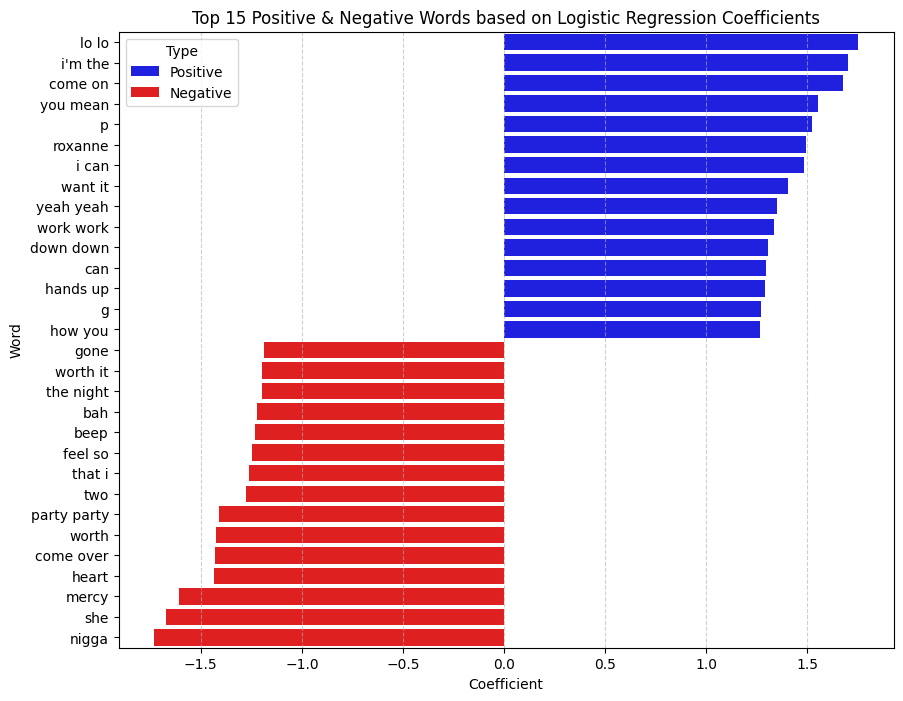

In [64]:
def plot_feature_importance(model, top_n = 20):
    tfidf = model.named_steps['tfidf']
    clf = model.named_steps['clf']

    feature_names = tfidf.get_feature_names_out()
    coefs = clf.coef_.flatten()

    top_pos_idx = coefs.argsort()[-top_n:]
    top_neg_idx = coefs.argsort()[:top_n]

    top_indices = np.concatenate([top_pos_idx, top_neg_idx])
    features_df = pd.DataFrame({
        'Word': feature_names[top_indices],
        'Coefficient': coefs[top_indices],
        'Type': ['Positive' if c > 0 else 'Negative' for c in coefs[top_indices]]
    })

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coefficient', y='Word', data=features_df.sort_values(by='Coefficient', ascending=False),
                hue='Type', palette={'Positive': 'blue', 'Negative': 'red'}, dodge=False)
    plt.title(f'Top {top_n} Positive & Negative Words based on Logistic Regression Coefficients')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

plot_feature_importance(model, top_n=15)

Analysis of graph above<br>
The bar chart above visualizes the top 15 words with the strongest positive and negative coefficients in the Logistic Regression model.

positive words (blue): Words like "lo lo", "yeah yeah", and "come on" shows high positive coefficients. <br>
This suggests that repetitive hooks, catchy phrases, and simple, rhythmic lyrics are strong indicators of a song making it to the Billboard Top 10.<br>

Negative words (red): Conversely, words like "gone", "mercy", and "she" have negative coefficients. <br>
We can assume that songs containing these specific words, often associated with certain genres like explicit Hip-hop or particular storytelling themes, are less likely to reach the top of mainstream pop charts compared to radio-friendly pop songs.

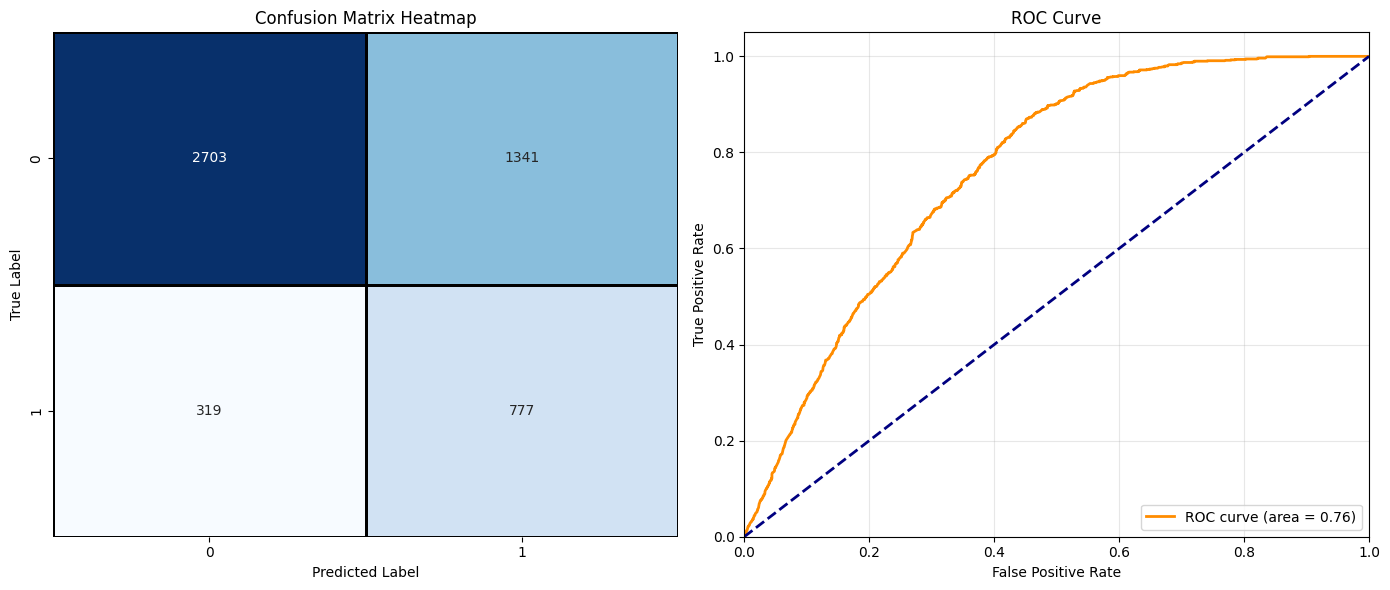

In [65]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

The graph above shows the model's ability to predict Billboard Top 10 hits and analyzes the Confusion Matrix and the ROC Curve.

The graph above displays the model's ability to predict Billboard Top 10 hits and examines the Confusion Matrix and the ROC Curve.

ROC-AUC Score (0.76): The model achieved an AUC score of 0.76. An AUC of 0.5 indicates random guessing, while 1.0 is perfect. A score of 0.76 suggests the model has a fair-to-good ability to distinguish between Top 10 hits and non-hits based solely on lyrics.

Confusion Matrix:
Recall (Sensitivity): The model correctly identified 777 out of 1096 actual Top 10 songs (True Positives). This indicates a relatively high recall, showing the model is effective at identifying potential hits.

False Positives: However, there are 1341 False Positives (songs predicted as hits but were not). This suggests that although many songs have "hit-like" lyrics, lyrics alone are not the only factor behind success; melody and artist popularity likely also play significant roles.

In [66]:
scores = cross_val_score(model, X, y, cv = 10, scoring = 'roc_auc')
print("CV ROC-AUC mean:", scores.mean(), "std:", scores.std())

tfidf = model.named_steps['tfidf']
clf = model.named_steps['clf']

feature_names = tfidf.get_feature_names_out()
coefs = clf.coef_[0]

top_pos_idx = coefs.argsort()[-30:][::-1]
top_neg_idx = coefs.argsort()[:30]

top_pos_words = [(feature_names[i], coefs[i]) for i in top_pos_idx]
top_neg_words = [(feature_names[i], coefs[i]) for i in top_neg_idx]

print("Top words pushing to Top10 (class 1):")
for w, c in top_pos_words:
    print(w, c)

print("\nTop words pushing to non-Top10 (class 0):")
for w, c in top_neg_words:
    print(w, c)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extr

CV ROC-AUC mean: 0.5285180983632597 std: 0.06393180682845111
Top words pushing to Top10 (class 1):
lo lo 1.7528365595023305
i'm the 1.7020073735522703
come on 1.6754402499312133
you mean 1.5529395654826652
p 1.5241624704079442
roxanne 1.4949548592377973
i can 1.4833808632519274
want it 1.4045982408859472
yeah yeah 1.3503982947014739
work work 1.3355238467328574
down down 1.303723966620677
can 1.2971509929679093
hands up 1.288906911981196
g 1.2695383163782314
how you 1.266590186752816
boy 1.2645680290210404
show you 1.260803984731661
smack that 1.2586926901677586
ooh woah 1.2504986784539105
let me 1.2435951298592034
just can't 1.2333012415792812
where where 1.2193623526473316
break break 1.2166757275359774
all night 1.2149930896429004
go head 1.2143964463493537
together 1.2125307446988374
break your 1.2032889100160082
christmas 1.18151725502616
i like 1.173612755687431
wiggle 1.1658246516906945

Top words pushing to non-Top10 (class 0):
nigga -1.7318696141070202
she -1.6720393892397643


In [67]:
def make_period(year):
    if 2000 <= year <= 2009:
        return "2000s"
    elif 2010 <= year <= 2019:
        return "2010s"
    else:
        return "2020s"

In [68]:
merged['period'] = merged['year'].apply(make_period)
merged = merged.dropna(subset=['lyrics']).copy()
merged['is_top10'] = (merged['rank'] <= 10).astype(int)

In [69]:
period_results = {}

for period, df_p in merged.groupby('period'):
    X = df_p['lyrics'].astype(str)
    y = df_p['is_top10']

    model = Pipeline([
        ("tfidf", TfidfVectorizer(tokenizer = tokenize,min_df = 5,max_df = 0.7, ngram_range = (1,2))),
        ("clf", LogisticRegression(max_iter = 1000, class_weight="balanced"))])

    model.fit(X, y)

    tfidf = model.named_steps['tfidf']
    clf = model.named_steps['clf']
    feature_names = tfidf.get_feature_names_out()
    coefs = clf.coef_[0]

    top_pos_idx = coefs.argsort()[-50:][::-1]
    top_pos_words = [(feature_names[i], coefs[i]) for i in top_pos_idx]

    period_results[period] = {
        "model": model,
        "top_words": top_pos_words,
        "coefs": coefs,
        "features": feature_names
    }

    print("year:", period)

    for w, c in top_pos_words[:5]:
        print(w, c)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


year: 2000s
down down 1.5263351157917113
mm 1.2739773542306945
my boo 1.254710848256756
boy 1.2158306009524515
smack that 1.1888180024914963


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


year: 2010s
i'm the 1.6200046525511693
got it 1.5784170858715718
ha ha 1.4954320039432998
wiggle 1.4113287023936458
what do 1.4031051222928026


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


year: 2020s
christmas 1.802646334382325
lo lo 1.386500117647024
it was 1.3400233934581751
for 1.3320885767938424
jingle 1.2966341380533712


In [70]:
year_word_counts = {}
year_doc_counts = {}

for year, df_y in merged.dropna(subset = ['lyrics']).groupby('year'):
    c = Counter()
    n_docs = 0
    for t in df_y['lyrics'].astype(str):
        tokens = set(tokenize(t))
        c.update(tokens)
        n_docs += 1
    year_word_counts[year] = c
    year_doc_counts[year] = n_docs

In [71]:
global_counter = Counter()
for c in year_word_counts.values():
    global_counter.update(c)

vocab = [w for w, cnt in global_counter.most_common(10)]
vocab

['you', 'also', 'might', 'like', 'the', 'i', 'and', 'to', 'me', 'a']

In [72]:
rows = []
for year, c in year_word_counts.items():
    total = sum(c.values())
    for w in vocab:
        freq = c[w] / total if total > 0 else 0
        rows.append({"year": year, "token": w, "freq": freq})

trend_df = pd.DataFrame(rows)
trend_df

,year,token,freq
0,2000,you,0.006320
1,2000,also,0.006320
2,2000,might,0.006320
3,2000,like,0.006264
4,2000,the,0.006112
...,...,...,...
235,2023,i,0.006331
236,2023,and,0.005850
237,2023,to,0.006153
238,2023,me,0.006257


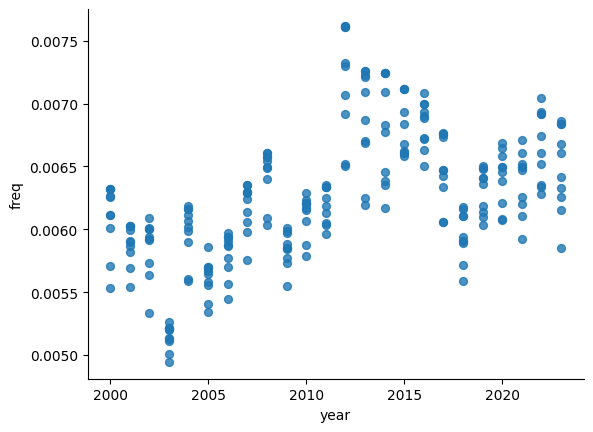

In [73]:
trend_df.plot(kind='scatter', x='year', y='freq', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [74]:
period_word_scores = {}

for period, df_p in merged.groupby('period'):
    years_in_p = df_p['year'].unique()
    sub = trend_df[trend_df['year'].isin(years_in_p)]
    mean_freq = sub.groupby('token')['freq'].mean()
    global_mean = trend_df.groupby('token')['freq'].mean()
    score = (mean_freq - global_mean).sort_values(ascending=False)
    period_word_scores[period] = score
    print("year: ", period)
    print(score.head(5))

year:  2000s
token
and   -0.000261
to    -0.000292
me    -0.000355
i     -0.000366
a     -0.000373
Name: freq, dtype: float64
year:  2010s
token
also     0.000347
might    0.000346
like     0.000339
you      0.000327
the      0.000290
Name: freq, dtype: float64
year:  2020s
token
a        0.000350
you      0.000314
like     0.000274
the      0.000250
might    0.000229
Name: freq, dtype: float64


# 6. Additional Analysis: Decade Classification

In [75]:
def make_decade(year):
    if 2000 <= year <= 2009:
        return "2000s"
    elif 2010 <= year <= 2019:
        return "2010s"
    else:
        return "2020s"

merged['decade'] = merged['year'].apply(make_decade)

In [76]:
data_dec = merged.dropna(subset=['lyrics']).copy()
X = data_dec['lyrics'].astype(str)
y = data_dec['decade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

decade_model = Pipeline([
    ("tfidf", TfidfVectorizer(tokenizer = tokenize, min_df = 10,max_df = 0.7, ngram_range = (1,2))),
     ("clf", LinearSVC())
])

decade_model.fit(X_train, y_train)
y_pred = decade_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[1689  215   30]
 [ 141 2122   39]
 [  59  119  726]]
              precision    recall  f1-score   support

       2000s       0.89      0.87      0.88      1934
       2010s       0.86      0.92      0.89      2302
       2020s       0.91      0.80      0.85       904

    accuracy                           0.88      5140
   macro avg       0.89      0.87      0.88      5140
weighted avg       0.88      0.88      0.88      5140

